# Problem statment

Want to calculate entropy, temperature and heat capacity of an Einstein solid where the solid contains 50 oscillators and from 0 to 100 units of energy. Like in problem 3.18 I will be constructing a table as well as making some plots

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
import scipy 
from math import factorial
import warnings
warnings.filterwarnings('ignore')

## Originally begin with 50 oscialators and then scale to 5000

In [2]:
num_oscillators_org = 50
num_oscillators_new = 5000

In [3]:
# energy 
q = np.linspace(0,100,101)
q

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

## Multiplicity $\Omega$

In [4]:
def multiplicity_harm(energy, n):
    """
    Find the multiplicty given a unit of energy 
    and the number of osciallators
    """
    
    numerator = factorial(energy + n - 1)
    denominator = factorial(energy) * factorial(n - 1)
    
    return(numerator/denominator)

In [5]:
mult_org = [multiplicity_harm(i, num_oscillators_org) for i in q]
mult_org = np.asarray(mult_org)
mult_org

array([1.00000000e+00, 5.00000000e+01, 1.27500000e+03, 2.21000000e+04,
       2.92825000e+05, 3.16251000e+06, 2.89896750e+07, 2.31917400e+08,
       1.65241148e+09, 1.06488740e+10, 6.28283563e+10, 3.42700125e+11,
       1.74205897e+12, 8.30828124e+12, 3.73872656e+13, 1.59519000e+14,
       6.48045937e+14, 2.51594305e+15, 9.36489913e+15, 3.35164811e+16,
       1.15631860e+17, 3.85439533e+17, 1.24391849e+18, 3.89400571e+18,
       1.18442674e+19, 3.50590314e+19, 1.01131821e+20, 2.84667349e+20,
       7.82835210e+20, 2.10555677e+21, 5.54463283e+21, 1.43087299e+22,
       3.62189725e+22, 8.99986591e+22, 2.19702609e+23, 5.27286261e+23,
       1.24498145e+24, 2.89374067e+24, 6.62514311e+24, 1.49490409e+25,
       3.32616159e+25, 7.30133032e+25, 1.58195490e+26, 3.38464770e+26,
       7.15391446e+26, 1.49437324e+27, 3.08620561e+27, 6.30373912e+27,
       1.27388061e+28, 2.54776123e+28, 5.04456723e+28, 9.89130829e+28,
       1.92119642e+29, 3.69739688e+29, 7.05244220e+29, 1.33355271e+30,
      

In [6]:
# for 5000 oscillators
mult_new = [multiplicity_harm(i, num_oscillators_new) for i in q]
mult_new = np.asarray(mult_new)
mult_new

array([1.00000000e+000, 5.00000000e+003, 1.25025000e+007, 2.08458350e+010,
       2.60729281e+013, 2.60937865e+016, 2.17665669e+019, 1.55662048e+022,
       9.74249845e+024, 5.42115914e+027, 2.71545861e+030, 1.23676797e+033,
       5.16453690e+035, 1.99112761e+038, 7.12965909e+040, 2.38320738e+043,
       7.46986562e+045, 2.20404976e+048, 6.14317648e+050, 1.62244524e+053,
       4.07152633e+055, 9.73288675e+057, 2.22131020e+060, 4.85018253e+062,
       1.01510279e+065, 2.03995056e+067, 3.94259675e+069, 7.33907084e+071,
       1.31762533e+074, 2.28448970e+076, 3.82956624e+078, 6.21378006e+080,
       9.76922733e+082, 1.48965915e+085, 2.20513368e+087, 3.17161227e+089,
       4.43585215e+091, 6.03755445e+093, 8.00293730e+095, 1.03381534e+098,
       1.30234887e+100, 1.60093617e+102, 1.92150458e+104, 2.25307584e+106,
       2.58233215e+108, 2.89450741e+110, 3.17451954e+112, 3.40821821e+114,
       3.58359944e+116, 3.69183877e+118, 3.72801879e+120, 3.69146959e+122,
       3.58569479e+124, 3

## Entropy $S$

In [7]:
entropy_org = np.log(mult_org)
entropy_new = np.log(mult_new)

## $\frac{kT}{\epsilon}$

In [8]:
# 50 osciallators 
kT_eps_org = [(q[i + 1]-q[i - 1])/(entropy_org[i+1]-entropy_org[i-1]) for i in range(1,100)]

# Include the 0 endpoints
kT_eps_org.insert(0,0)
kT_eps_org.append(0)
kT_eps_org = np.asarray(kT_eps_org)

# 5000 oscillators 
kT_eps_new = [(q[i + 1]-q[i - 1])/(entropy_new[i+1]-entropy_new[i-1]) for i in range(1,100)]

# Include the 0 endpoints
kT_eps_new.insert(0,0)
kT_eps_new.append(0)
kT_eps_new = np.asarray(kT_eps_new)

## Heat Capacity

In [9]:
# 50 oscillators 
heat_cap_org = [2/(kT_eps_org[i+1]-kT_eps_org[i-1])/num_oscillators_org for i in range(1,100)]
heat_cap_org.insert(0,None)
heat_cap_org.append(None)
heat_cap_org = np.asarray(heat_cap_org)

# 5000 oscillators
heat_cap_new = [2/(kT_eps_new[i+1]-kT_eps_new[i-1])/num_oscillators_new for i in range(1,100)]
heat_cap_new.insert(0,None)
heat_cap_new.append(None)
heat_cap_new = np.asarray(heat_cap_new)

## Create Table

In [13]:
# for 50 oscillators (500 would be created the same way)
table = pd.DataFrame({'Energy': q, 'Multiplicity': mult_org,
                     'S/k': entropy_org, 'kT/eps': kT_eps_org,
                     'C/Nk': heat_cap_org})
table.set_index('Energy', inplace=True)
table

,Multiplicity,S/k,kT/eps,C/Nk
Energy,,,,
0.0,1.000000e+00,0.000000,0.000000,None
1.0,5.000000e+01,3.912023,0.279693,0.121826
2.0,1.275000e+03,7.150701,0.328337,0.453606
3.0,2.210000e+04,10.003333,0.367875,0.536184
4.0,2.928250e+05,12.587330,0.402938,0.593742
5.0,3.162510e+06,14.966877,0.435244,0.637774
6.0,2.898968e+07,17.182450,0.465656,0.673043
7.0,2.319174e+08,19.261892,0.494676,0.702125
8.0,1.652411e+09,21.225502,0.522626,0.7266


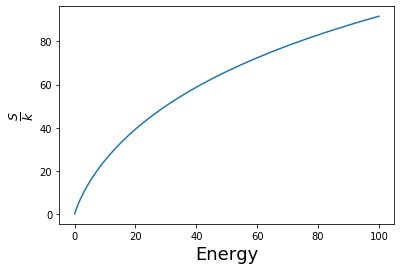

In [24]:
# entropy v energy 
plt.plot(q, entropy_org);
plt.xlabel('Energy', fontsize=18)
plt.ylabel(r'$\frac{S}{k}$', fontsize=18);

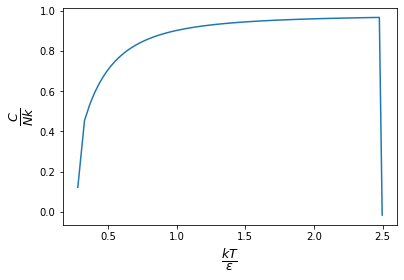

In [29]:
# plot of heat capacity versus temperature 
plt.plot(kT_eps_org, heat_cap_org);
plt.xlabel(r'$\frac{kT}{\epsilon}$', fontsize=18);
plt.ylabel(r'$\frac{C}{Nk}$', fontsize=18);